In [7]:
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
import numpy as np
from operator import floordiv
import sys
import math
from numpy import fft
from scipy.signal import correlate2d
from scipy.special import comb
from skimage.util import random_noise
import os
from skimage.color import hsv2rgb
from skimage import img_as_float

# Presence Exercise 1

## 1. Import, show, and save the image file

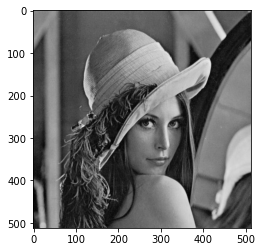

In [3]:
lena = imread("lena.jpg", as_gray=True)
plt.gray() #makes everything grayscale
plt.imshow(lena)

## 2. Intensity transformation

In [4]:
#1. clipping
def clipping(img, a, b):

    return np.clip(img, a_min = a, a_max = b)
    
#2. mapping

def normalization(img):
    
    return (img - np.min(img))/(np.max(img) - np.min(img))

#3. thresholding
    
def thresholding(img, threshold):

    thresholds = np.ones(img.shape)*threshold
    
    return(img > thresholds) * 1
    
#4. gamma correction
def gammacorrection(img, r):
    
    return pow(img, r)

#5. log transformation
def logtransformation(img):
    
    return np.log2(img + 1)

#get the spectrum of the image(lena)
lena_shifted = lena - np.mean(lena)

spectrum = np.fft.fftshift(lena_shifted)

## see the results from functions above

### 1. normalization a

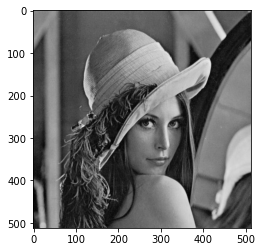

In [5]:
normalized = normalization(lena)

plt.imshow(normalized)

### 1. normalization b

Text(0.5, 1.0, 'image normalized')

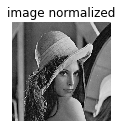

In [9]:
img = imread("lena.jpg", as_gray = True)/255

#this plot has 2 rows, 3 columns, and the first
plt.subplot(2,3,1)

plt.imshow(img, interpolation = "nearest", cmap = plt.cm.get_cmap("gray"), vmin = 0, vmax = 1)
plt.axis("off")
plt.title("image normalized")

### 2. Gamma a

Text(0.5, 1.0, 'image squared')

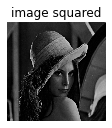

In [10]:
imgGamma = np.square(img)
plt.subplot(2,3,2)
plt.imshow(imgGamma, interpolation = "nearest", cmap = plt.cm.get_cmap("gray"), vmin = 0, vmax = 1)
plt.axis("off")
plt.title("image squared")

### 2. Gamma b

Text(0.5, 1.0, 'image squared root')

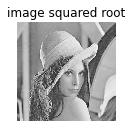

In [13]:
imgGamma2 = np.power(img, .5)
plt.subplot(2,3,3)
plt.imshow(imgGamma2, interpolation = "nearest", cmap = plt.cm.get_cmap("gray"), vmin = 0, vmax = 1)
plt.axis("off")
plt.title("image squared root")

### 3. Logarithm with spectrum

Text(0.5, 1.0, '$T^{norm}(|FFT(f-mean(f))|)$')

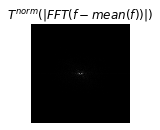

In [14]:
m = lena.mean()
absC = fft.fftshift(abs(fft.fft2(lena-m)))

plt.subplot(2, 3, 4)
plt.imshow(absC, interpolation='nearest', cmap=plt.cm.get_cmap('gray'))
plt.axis('off')
plt.title('$T^{norm}(|FFT(f-mean(f))|)$')


Text(0.5, 1.0, '$T^{norm}(T^{log}(|FFT(f-mean(f))|))$')

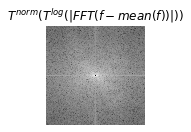

In [15]:
logAbsC = np.log2(1+absC)
plt.subplot(2, 3, 5)
plt.imshow(logAbsC, interpolation='nearest', cmap=plt.cm.get_cmap('gray'))
plt.axis('off')
plt.title('$T^{norm}(T^{log}(|FFT(f-mean(f))|))$')

### 4. Threshold intensity transform

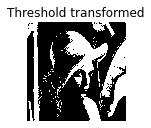

In [16]:
imgThreshold = img > 0.5
plt.subplot(2,3,6)
plt.imshow(imgThreshold, interpolation = "nearest", cmap = plt.cm.get_cmap("gray"), vmin = 0, vmax = 1)
plt.axis("off")
plt.title("Threshold transformed")
plt.show()

## 3. Reduce image resolution from 2^n to 2^n-1

In [17]:
#To this end, the values of 2x2 pixels on the fine grid should be averaged
#to get the value for the corresponding pixel on the coarse grid
#TODO : Sensor should see every 2x2 Pixels by moving just one cell
# Attention!!! the image should be normalized !!!!

In [18]:
def reducing_resolution(img):
    
    n,m = img.shape
    
    reduced_resolution = np.zeros((n//2,m//2))
    
    for i in range(n//2):
        
        for j in range(m//2):
            
            reduced_resolution[i, j] = (img[2*i,2*j] + img[2*i+1,2*j] + img[2*i, 2*j+1] + img[2*i+1, 2*j+1])/4
            
    """
    #alternativ way using array
    n, m = img.shape
    smallimageAlt = 0.25 * (image[:2*m:2, :2*n:2] + image[1:2*m:2, :2*n:2]
                        + image[:2*m:2, 1:2*n:2] + image[1:2*m:2, 1:2*n:2])
    imsave("smallAltPy.png", (255*smallimageAlt).astype('uint8'))

    plt.figure(2)
    plt.imshow(smallimage, interpolation='nearest', cmap=plt.cm.get_cmap('gray'), vmin=0, vmax=1)
    plt.show()
    """
            
    return reduced_resolution

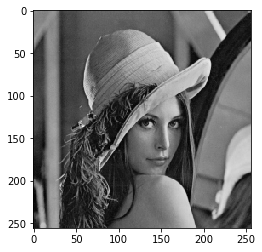

In [19]:
lena_norm = lena/255

reduced_lena = reducing_resolution(lena_norm)

imsave("LenasmallAltPy.png", (255*reduced_lena).astype('uint8'))
plt.figure(2)
plt.imshow(reduced_lena, interpolation='nearest', cmap=plt.cm.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

# Presence exercise sheet 2

## Problem 1
Isodata algorithm Example 1.13

In [24]:
#Own implementation of histogram

def my_histogram(img, numbin):
    
    max_img = img.max()
    min_img = img.min()
    
    # first normalization
    # we visualize colors from 0 to numbin value , i.g. numbin should correspond to the maximum color value
    # the normalization gives us the color value range btw 0 and 1, thus, multiplying numbin-1 gives us 
    # a corresponding color value between [0, numbin - 1]
    img = (np.floor((img.ravel() - min_img)*(numbin - 1)/(max_img - min_img))).astype(int)
    
    """
    hist = np.zeros(img.size, dtype = int)
    
    for i in range(img.size):
    
        hist[img[i]] = hist[img[i]] + 1
    
    """
    
    histo = np.bincount(img)
    
    return histo

def my_equalizer(img, binnum):
    
    # we need these both to normalization
    fmax = img.max()
    fmin = img.min()
    
    # requried to get the size
    n,m = img.shape
    
    # get the histogram
    histo = my_histogram(img, binnum)
    
    # get the cumulatives
    cumulatives = np.cumsum(histo)
    
    hist_ind = (np.floor((binnum - 1)*(img[:, :] - fmin)/(fmax - fmin))).astype(int)
    
    equalized = (fmax - fmin)*cumulatives[hist_ind[:, :]]/(n*m) + fmin
    
    return equalized


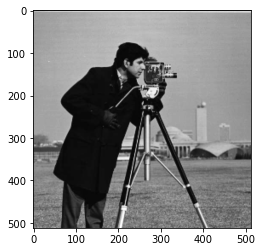

In [25]:
#showing normalized cameraman 
#cameraman.jpg
cameraman = imread("cameraman.jpg", as_gray = True)/255
plt.imshow(cameraman)

In [26]:
my_histogram(cameraman, 256)

array([ 377,   88,  128,  192,  213,  284,  420,  718, 2146, 5351, 2452,
       5124, 2968, 8341, 8298, 2679, 4675, 1422, 1390,  877,  636,  617,
        586,  531,  475,  432,  441,  446,  485,  480,  488,  554,  608,
        604,  460,  426,  379,  389,  372,  343,  370,  334,  339,  317,
        290,  281,  308,  317,  288,  280,  294,  258,  250,  240,  267,
        276,  299,  335,  293,  303,  314,  317,  277,  250,  268,  263,
        244,  266,  263,  248,  251,  225,  200,  188,  197,  224,  195,
        184,  196,  224,  198,  211,  228,  219,  249,  267,  233,  257,
        286,  299,  318,  319,  389,  385,  421,  438,  428,  530,  536,
        556,  620,  622,  726,  719,  743,  802,  875,  887,  928,  963,
       1047, 1018, 1076, 1088, 1112, 1188, 1218, 1252, 1319, 1348, 1403,
       1330, 1409, 1401, 1455, 1504, 1560, 1561, 1620, 1553, 1560, 1650,
       1656, 1611, 1688, 1570, 1514, 1477, 1562, 1332, 1357, 1382, 1372,
       1457, 1633, 1523, 2119, 1798, 2226, 2287, 19

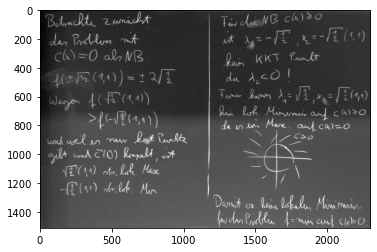

In [30]:
tafel = imread("tafel.png", as_gray = True)
plt.gray()
plt.imshow(tafel)

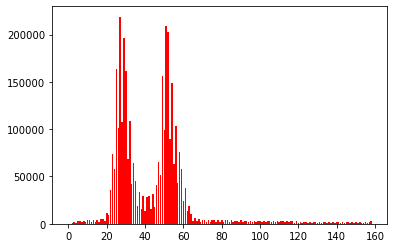

In [31]:
binsbins = range(0, 160)

tafel_hist, _ = np.histogram(tafel, binsbins)

plt.bar(np.arange(len(tafel_hist)), tafel_hist, color='red')
plt.show()

In [32]:
#sys.float_info.epsilon
#using floor to get the [theta]

def newtheta(hist, theta):
    
    indices1 = list(range(0, theta + 1))
    indices2 = list(range(theta + 1, len(hist)))

    hist1 = hist[indices1]
    hist2 = hist[indices2]
    
    return (np.multiply(hist1, indices1).sum()/hist1.sum() + np.multiply(hist2, indices2).sum()/hist2.sum())*0.5

def isodata(img):
    
    bins = list(range(0, img.max()))
    hist, _ = np.histogram(img, bins)
    theta = math.floor((img.min() + img.max())/2)
    
    repeat = True
    
    while(repeat):
        
        new_theta = newtheta(hist, theta)
        
        if new_theta - theta <= sys.float_info.epsilon:
            
            break
        
        else :
            
            theta = new_theta
            continue
            
    return new_theta


In [33]:
threshold = isodata(tafel)

In [34]:
threshold

76.7974970087456

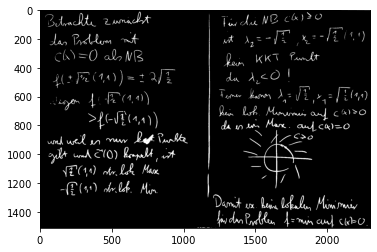

In [35]:
tafel_thresholded = thresholding(tafel, threshold)
#vizualize the thresholded tafel
plt.gray()
plt.imshow(tafel_thresholded)

In [36]:
#another isodata from tutorial session

def isodata_threshold(image, num_bins):

    # Note: numpy's histogram function is slightly different from the version in the lecture.
    histo, edges = np.histogram(image, num_bins)

    # The code below assumes that the image has values in [0,1],
    # so we transform the image accordingly.
    image = image - image.min()
    image = image / image.max()

    old_theta = -1
    theta = 0.5 * (image.min() + image.max())

    while(abs(old_theta - theta) > 0.0005):
        old_theta = theta
        floor_theta = int(np.floor((num_bins - 1) * theta)) + 1

        numerator_A = 0
        denominator_A = 0
        for i in range(floor_theta):
            numerator_A = numerator_A + i / (num_bins - 1) * histo[i]
            denominator_A = denominator_A + histo[i]

        numerator_B = 0
        denominator_B = 0
        for i in range(floor_theta, num_bins):
            numerator_B = numerator_B + i / (num_bins - 1) * histo[i]
            denominator_B = denominator_B + histo[i]

        theta = 0.5 * (numerator_A/denominator_A + numerator_B/denominator_B)

    print(f'Using threshold {theta:.5f}')
    thresholdedImage = image > theta
    return thresholdedImage, theta


Using threshold 0.47782
122.32184783953743


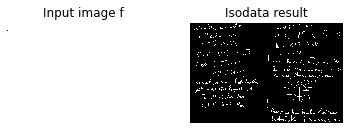

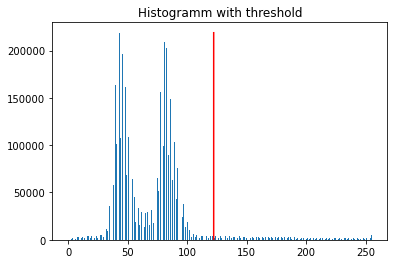

In [39]:
imageThreshold, theta = isodata_threshold(tafel, 256)
# scale theta for plot
theta *= 256
print(theta)
# Display input and result
plt.subplot(1, 2, 1)
plt.imshow(tafel, interpolation='nearest',
               cmap=plt.cm.get_cmap('gray'), vmin=0, vmax=1)
plt.axis('off')
plt.title('Input image f')
plt.subplot(1, 2, 2)
plt.imshow(imageThreshold, interpolation='nearest',
               cmap=plt.cm.get_cmap('gray'), vmin=0, vmax=1)
plt.axis('off')
plt.title('Isodata result')

plt.figure()
histo, edges = np.histogram(tafel, 256)
plt.title('Histogramm with threshold')
plt.bar(range(histo.size), histo)
plt.plot(np.ones(histo.max())*theta, range(histo.max()), 'r-')
plt.show()

NameError: name 'bin_histogram' is not defined

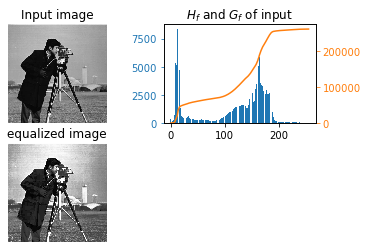

In [40]:
equalized_image = my_equalizer(cameraman, 255)

# Plot the input image
plt.subplot(2, 2, 1)
plt.imshow(cameraman, interpolation='nearest',
               cmap=plt.cm.get_cmap('gray'), vmin=0, vmax=1)
plt.title('Input image')
plt.axis('off')

# Plot the histogram of the input image
H_f = my_histogram(cameraman, 256)
plt.subplot(2, 2, 2)
plt.bar(range(H_f.size), H_f, color='C0')
ax1 = plt.gca()
ax1.tick_params('y', colors='C0')
ax2 = plt.twinx()
ax2.plot(np.cumsum(H_f), color='C1')
ax2.tick_params('y', colors='C1')
ax2.set_ylim([0, None])
plt.title('$H_f$ and $G_f$ of input')

# Plot the equalized image
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, interpolation='nearest',
               cmap=plt.cm.get_cmap('gray'), vmin=0, vmax=1)
plt.title('equalized image')
plt.axis('off')

# Plot the histogram of the equalized image
H_f = bin_histogram(equalized_image, 256)
plt.subplot(2, 2, 4)
plt.bar(range(H_f.size), H_f, color='C0')
ax1 = plt.gca()
ax1.tick_params('y', colors='C0')
ax2 = plt.twinx()
ax2.plot(np.cumsum(H_f), color='C1')
ax2.tick_params('y', colors='C1')
ax2.set_ylim([0, None])
plt.title('$H_f$ and $G_f$ of equalized image')
plt.show()

# Exercise Sheet 3 Denoising Filters

## 0. Padding & Cross-Correlation

In [41]:
# using np.pad, this function zero-pads the given image in both 1-d and 2-d direction
# assumed the image is 2 d
# filter assumes that each dimension either x or y
# the size of filter is 2a + 1(-a, -a+1, -a+2, ..., 0 , 1, ... a)
def zero_padding(img, a):
    
    # using np padd
    # np.pad(x, ((1, 0), (1, 0)))
    
    return np.pad(img, (a, a))

In [110]:
# this function generates the cross_correlated point for the given filter
# it takes the padded image, filter, the size of window a, and the index of the given image (tuple)
def cross_correlation(img, kernel):
    
    a = (kernel.shape[0] - 1)//2
    b = (kernel.shape[1] - 1)//2
    
    n,m = img.shape
    
    new_img = np.zeros((n,m))

    pad_img = np.pad(img, (a,a))

    for i in range(n):
        
        for j in range(m):
            
            # ATTENTION!
            # numpy array shoud be accessed as the form below,
            # otherwise, it brings the whole row or colum -> causes problem with numpy matmul or something
            sub_img = pad_img[i:i + 2*a + 1, j:j + 2*b + 1]
            
            new_img[i,j] = np.dot(sub_img.ravel(), kernel.ravel())

    # also
    # output = correlate2d(image, kernel, mode = "same") possible

    return new_img


def filter_image(image, kernel, direct=True):
    if direct:
        m, n = image.shape
        c, d = kernel.shape
        a = int((c - 1) / 2)
        b = int((d - 1) / 2)
        padded_image = np.pad(image, (a, b))
        output_image = np.zeros((m, n))
        # Straightforward loops to compute the correlation
        for i in range(m):
            for j in range(n):
                sub_image = padded_image[i:i+c, j:j+d]
                output_image[i, j] = np.dot(sub_image.ravel(), kernel.ravel())
    else:
        # Python way of computing the correlation
        output_image = correlate2d(image, kernel, mode='same')
    return output_image

In [43]:
img = np.array(([1,2,3],[4,5,6],[7,8,9]))

np.pad(img, (1,1)).shape

(5, 5)

## 1. Mean value filter 

In [44]:
# this mean filter assumes the image is zero padded
# this mean filter averages each pixel dot product
# to make the dot product of kernel flexible, I got separated the parameters into one d and two d
# principle of filter : 
# F = f_i, i in {1, 2, ... , m}
# filter W = (w_-1, w_0, w_1)
# f_hat_i = sum j from -1 to 1 w_j*f_i+j 
def mean_filter(a):
    
    mean_filter = np.ones((2*a + 1, 2*a + 1))
    
    return mean_filter/np.sum(mean_filter)
            

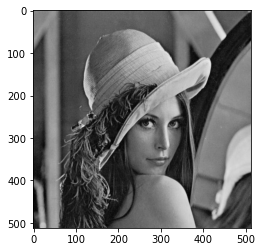

In [45]:
# index of the discrete image start from top left
lena = imread("lena.jpg", as_gray=True)
plt.gray() #makes everything grayscale
plt.imshow(lena)

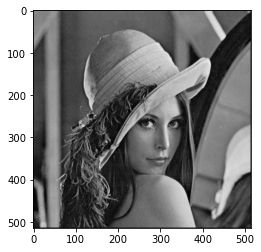

In [46]:
plt.gray() #makes everything grayscale

plt.imshow(zero_padding(lena, 1))

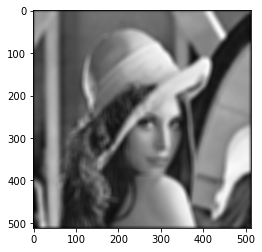

In [47]:
# the result of applying mean value filter
# noise is getting reduced but edges are also blurred at the same time
mean_filter3x3 = mean_filter(6)

lena_3x3 = cross_correlation(lena/255, mean_filter3x3)

plt.gray() #makes everything grayscale
plt.imshow(lena_3x3)

## Experiment to understand the index of image

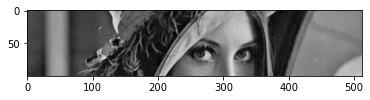

In [48]:
# the image index starts from top left (0,0) 
# the following loads image values from 200 to 300th rows
lena_small = lena[200:300]
plt.gray() #makes everything grayscale
plt.imshow(lena_small)

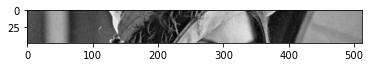

In [49]:
# now we got 100 rows between 200th and 300th rows
# in these, we extract again the vertical half
lena_small = lena[200:300][0:50]
plt.gray() #makes everything grayscale
plt.imshow(lena_small)

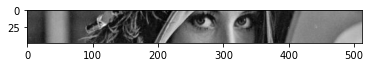

In [50]:
lena_small = lena[200:300][50:100]
plt.gray() #makes everything grayscale
plt.imshow(lena_small)

## 2. Gaussian filter

In [114]:
def gaussian_filter(a, sig):
    
    g_filter = np.zeros((2*a + 1, 2*a + 1))
    
    for i in range(-a, a+1):
        
        for j in range(-a, a+1):
            
            g_filter[i+a , j+a] = np.exp(-(i**2 + j**2)/2*(sig**2))
            """
            indX, indY = np.meshgrid(range(-a, a+1), range(-a, a+1))
            kernel = np.exp(- (np.square(indX) + np.square(indY)) / (2 * sigma**2))
            kernel = kernel / np.sum(kernel)
            
            """
            
    return g_filter / np.sum(g_filter)


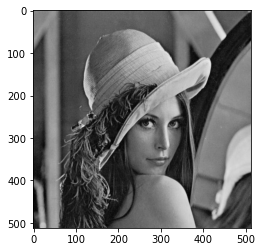

In [52]:
plt.gray() #makes everything grayscale
plt.imshow(lena)

In [53]:
gaussian_kernel = gaussian_filter(1, 1)

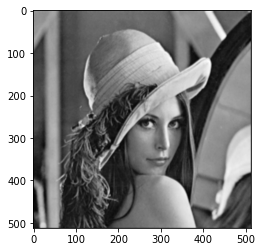

In [54]:
lena_gaussian = cross_correlation(lena/255, gaussian_kernel)

plt.gray() #makes everything grayscale
plt.imshow(lena_gaussian)

## 3. Binomial filter

In [55]:
# Cross correlation function for binomial filter
# Binomial filter uses cross correlation to get the binomial array
# the only parameter is B
def cross_correlation_binom(B):
    
    # the kernel for the binomial filter is 1/2 * (1,1)
    W = np.ones(2)
    
    # to get the next level binomial, padding is necessary s.t.
    # B0 = (1), B1 = W * (0, B0, 0)
    # B(n+1) = W* (0, B(n), 0)
    B = np.pad(B, (1,1))
    
    # but the last zero just ignore because 
    # every last element of binomial is 1 and the dot product will leave
    # just the given W
    new_B = B[:len(B)-1]
    
    # cross-correlation using a loop
    for j in range(0, len(B)-1):
            
        new_B[j] = np.dot(W, B[j:j+2])
        
    return new_B


In [56]:
# Binomial filter is approximation of gaussian filter
# this function takes the final level of binomial a
# and iterates the function above a times
def binomial_filter(a):
    
    B = np.array([1])
    
    for i in range(a):
        
        B = cross_correlation_binom(B)
        
    # at the end, reshape the tensor product
    # and divide by the sum of all the tensor product
    return np.reshape(np.kron(B,B)/np.sum(np.kron(B,B)), (-1, len(B)))

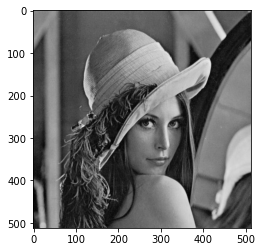

In [57]:
plt.gray() #makes everything grayscale

plt.imshow(lena)

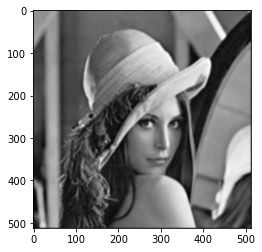

In [58]:
lena_binom = cross_correlation(lena/255, binomial_filter(10))

plt.gray() #makes everything grayscale
plt.imshow(lena_binom)

In [64]:
q = binomial_filter(2)

In [65]:
q

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

## 4. Duto blur

In [478]:
def duto_blur(img, a, sig, lam):
    
    gaussian_filter = gaussian_filter(a, sig)
    
    return lam*img + (1-lam)*cross_correlation(img, gaussian_filter, a)

## 5. Median filter

In [600]:
def median_filter(img, a):
    
    kernel = np.zeros((2*a + 1, 2*a + 1))
    
    n, m = img.shape
    
    new_img = np.zeros((n, m))
    
    #padded_img = np.pad(img, (a,a))
    
    for i in range(n):
        
        for j in range(m):
            
            new_img[i,j] = np.median(np.ravel(img[i:i+2*a+1, j:j+2*a+1]), axis = None)
            
    return new_img

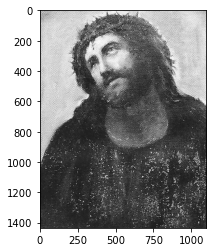

In [601]:
# index of the discrete image start from top left
eccehommos = imread("eccehommos.png", as_gray=True)
plt.gray() #makes everything grayscale
plt.imshow(eccehommos)

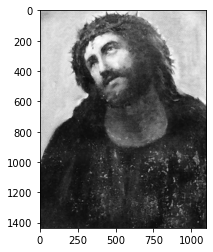

In [603]:
eccehommos_median = median_filter(eccehommos, 4)

plt.imshow(eccehommos_median)

In [598]:
def median_filter_image(image, a):
    m, n = image.shape
    output_image = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            start_X = max(0, i - a)
            stop_X = min(m, i + a + 1)
            start_Y = max(1, j - a)
            stop_Y = min(n, j + a + 1)
            sub_image = image[start_X:stop_X, start_Y:stop_Y]
            output_image[i, j] = np.median(sub_image)

    return output_image


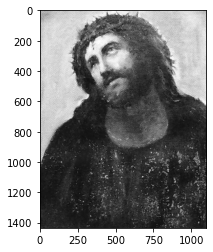

In [599]:
eccehommos_median2 = median_filter_image(eccehommos, 3)

plt.imshow(eccehommos_median2)

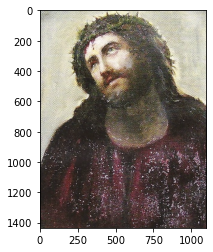

In [612]:
# index of the discrete image start from top left
eccehommos = imread("eccehommos.png")
plt.gray() #makes everything grayscale
plt.imshow(eccehommos)

# Exercise 4 Edge Detector

## a. Prewitt && Sobel Edge Detector

In [651]:
# prewitt edge detector detects edges based on the derivative mean kernel
# Prewitt edge detector reacts faster than sobel
# less sensitive to the diagonal edges
# edges can be less emphasized
def prewitt_detector(img):
    
    derivative_kernel = np.array([-1,0,1])/2
    """
    alternative
    indX, indY = np.meshgrid(range(-1, 2), range(-1, 2))
    
    np.meshgrid(-1,2)
    """
    mean_kernel = np.ones(3)/3
    
    derivative_x1 = np.kron(mean_kernel, derivative_kernel).reshape(-1, 3)
    derivative_x2 = np.kron(mean_kernel, derivative_kernel).reshape(-1, 3).T*-1
    
    DX1 = correlate2d(img, derivative_x1, mode = "same")
    DX2 = correlate2d(img, derivative_x2, mode = "same")
    
    return np.hypot(DX1, DX2)

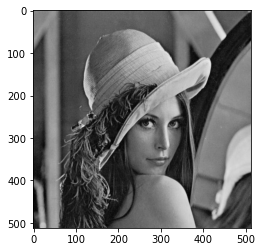

In [652]:
plt.gray() #makes everything grayscale

plt.imshow(lena)

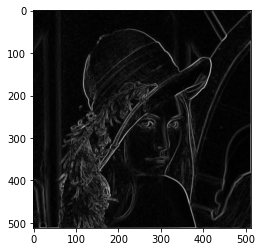

In [653]:
plt.imshow(prewitt_detector(lena))

In [654]:
# Sobel edge detector can detect edges in every direction
# either vertical, horizontal, and even diagonal
# but sensitive to diagonals 
def sobel_detector(img):
    
    
    derivative_kernel = np.array([-1,0,1])/2
    binomial_kernel = np.array([1,2,1])/4
    
    # this is mask direction x1
    # the width of detected mask is proportional to the size of mask
    derivative_x1 = np.kron(mean_kernel, derivative_kernel).reshape(-1, 3)
    derivative_x2 = np.kron(mean_kernel, derivative_kernel).reshape(-1, 3).T*-1
    
    DX1 = correlate2d(img, derivative_x1, mode = "same")
    DX2 = correlate2d(img, derivative_x2, mode = "same")
    
    return np.hypot(DX1, DX2)

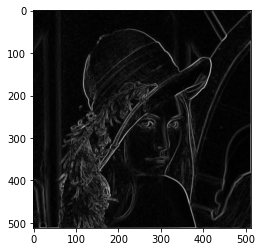

In [655]:
plt.imshow(sobel_detector(lena))

In [662]:
def PrewittSobelFilterKernel(direction, mode='Prewitt'):
    diff = np.array([-1, 0, 1]) / 2
    if mode == 'Prewitt':
        mean = np.array([1, 1, 1]) / 3
    elif mode == 'Sobel':
        mean = np.array([1, 2, 1]) / 4
    else:
        raise ValueError('Invalid mode')

    if direction == 1:
        return np.tensordot(diff, mean, axes=0)
    else:
        return np.tensordot(mean, diff, axes=0)

In [669]:
inputFilename = 'peppers.png'
inputImage = imread(inputFilename, as_gray=True)
inputImage = img_as_float(inputImage)
# Create and apply different filters to the image
DX = correlate2d(inputImage, PrewittSobelFilterKernel(
        0, 'Sobel'), mode='same', boundary='symm')
DY = correlate2d(inputImage, PrewittSobelFilterKernel(
        1, 'Sobel'), mode='same', boundary='symm')

# Compute gradient size and directions (as angles)

# the squared sum of derivation both in X and Y direction
size = np.hypot(DX, DY)
# normalization
size /= np.amax(size)
# get the angle to achieve the HSV image
angles = -np.arctan2(DY, DX)
# image derivated in X direction
imsave('_DX.png', DX)
# image derivated in Y direction
imsave('_DY.png', DY)
# the squared sum of both above
imsave('_gradSize.png', size)

colorImage = np.zeros(inputImage.shape+(3,))
# get the color value in radian i.g. add the 2*pi to the achieved angle and divide by 2*pi
colorImage[..., 0] = np.remainder(angles + 2*np.pi, 2*np.pi) / (2*np.pi)
colorImage[..., 1] = 1
colorImage[..., 2] = 1
# just H channel, every color is distriuted between 0 and 1 0, 1-> red, 0 < color < 1 -> orange, blue, green and so on 
imsave('_gradDirGray.png', colorImage[..., 0])
# we have in the saturation and brightness both 1, thus, looks likea rainbow
imsave('_gradDirH11.png', hsv2rgb(colorImage))
colorImage[..., 1] = size
imsave('_gradDirHS1.png', hsv2rgb(colorImage))
colorImage[..., 2] = size
imsave('_gradDirHSV.png', hsv2rgb(colorImage))

Lossy conversion from float64 to uint8. Range [-0.33088235294117646, 0.3803921568627451]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-0.31568627450980397, 0.32990196078431366]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


[[0.91024837 0.89746633 0.80426849 ... 0.19469869 0.40175755 0.45297913]
 [0.92458422 0.91245743 0.76044043 ... 0.23883449 0.3804546  0.42858346]
 [0.00254626 0.00769504 0.3507051  ... 0.73413724 0.54177171 0.53333971]
 ...
 [0.99810539 0.99899904 0.39609623 ... 0.375      0.98488797 0.95179438]
 [0.00494111 0.01206456 0.55843753 ... 0.25611833 0.03439099 0.95864926]
 [0.0246685  0.02927551 0.94339879 ... 0.22371577 0.02296437 0.99842426]]


## b. Canny Edge Detector

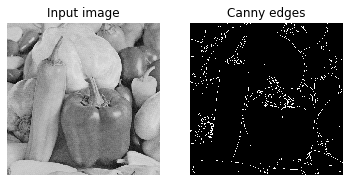

In [681]:
def CannyEdges(image, sigma, theta, a, b):
    m, n = image.shape
    # Compute the Gauss kernel
    # create the two 2*b+1 X 2*a + 1 size 2D array
    # the first 2D array is consisting of -b to - b+1
    # the second 2D array is consistong of -a to a+1
    # i.e. it generates X and Y coordinate centered at zero
    indX, indY = np.meshgrid(range(-b, b+1), range(-a, a+1))
    G = np.exp(- (np.square(indX) + np.square(indY)) / (2 * sigma**2))
    G = G / np.sum(G)
    # Compute the Gauss kernel derivatives
    G_x = np.multiply(G, -indX / (sigma**2))
    G_x = G_x - np.mean(G_x)
    G_y = np.multiply(G, -indY / (sigma**2))
    G_y = G_y - np.mean(G_y)
    # Compute x and y derivative of the image by filtering
    I_x = correlate2d(image, -G_x, mode='same')
    I_y = correlate2d(image, -G_y, mode='same')
    # Compute the norm of the image gradient at each pixel,
    # padded with "-1", so that we have neighboring rho values
    # in all directions at each image pixel.
    rho = np.pad(np.hypot(I_x, I_y), (1, 1),
                 mode='constant', constant_values=-1)
    # Compute angles corresponding to the gradient direction.
    Theta = np.arctan2(I_y, I_x)
    # Round angles to multiples of 45 degrees
    Theta = np.round(8*(Theta+np.pi)/(2*np.pi)) * 2*np.pi / 8 - np.pi
    # Compute directions for each pixel for the Canny condition
    dir = np.zeros((m, n, 2))
    dir[:, :, 0] = np.sin(Theta)
    dir[:, :, 1] = np.cos(Theta)
    dir = np.round(dir).astype(int)
    # Check the Canny condition at each pixel
    outputImage = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            if ((rho[i+1, j+1] >= theta) and
                (rho[i+1, j+1] > max(rho[i+1+dir[i, j, 0], j+1+dir[i, j, 1]],
                                     rho[i+1-dir[i, j, 0], j+1-dir[i, j, 1]]))):
                outputImage[i, j] = 1

    return outputImage


# Read data
inputImage = imread('peppers.png', as_gray=True)
inputImage = img_as_float(inputImage)

# Set parameters
a = 9
b = 9
sigma = 0.75
theta = 0.05

# Compute the Canny edges
C = CannyEdges(inputImage, sigma, theta, a, b)

plt.subplot(1, 2, 1)
plt.imshow(inputImage, interpolation='nearest',
           cmap=plt.cm.get_cmap('gray'), vmin=0, vmax=1)
plt.axis('off')
plt.title('Input image')

plt.subplot(1, 2, 2)
plt.imshow(C, interpolation='nearest',
           cmap=plt.cm.get_cmap('gray'), vmin=0, vmax=1)
plt.axis('off')
plt.title('Canny edges')
plt.show()

# Exercise 5

## a. Erosion and Dilation

In [697]:
def erosion(img, a):
    
    n, m = img.shape
    
    new_img = np.zeros((n, m))
    
    for i in range(n):
        
        for j in range(m):
            
            startX = max(0, i - a)
            stopX = min(n, i + a + 1)
            startY = max(0, j - a)
            stopY = min(m, j + a + 1)
            
            new_img[i, j] = np.amin(img[startX:stopX, startY:stopY])
            
    return new_img
    
def dilation(img, a):
    
    n, m = img.shape
    
    new_img = np.zeros((n, m))
    
    for i in range(n):
        
        for j in range(m):
            
            startX = max(0, i - a)
            stopX = min(n, i + a + 1)
            startY = max(0, j - a)
            stopY = min(m, j + a + 1)
            
            new_img[i, j] = np.amax(img[startX:stopX, startY:stopY])
            
    return new_img


Using threshold 0.28656


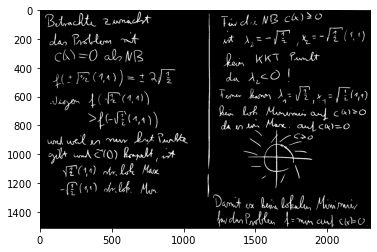

In [735]:
#tafel = skimage.io.imread("tafel.png", as_gray = True)

a = 7

opened_tafel = dilation(erosion(tafel, a), a)

without_smudge = tafel - opened_tafel
without_smudge_result, _ = isodata_threshold(without_smudge, 256)
plt.gray()
plt.imshow(without_smudge_result)

# Exercise 8 Fourier transform (Perfect Low Pass Filter & Deconvolution)

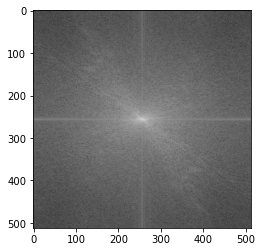

In [754]:
lena_fourier = np.fft.fftshift(np.fft.fft2(lena))
plt.imshow(np.log(abs(lena_fourier)), cmap = "gray")

# a. Perfect Low Pass Filter

In [ ]:
def lowPassFilter(inputImage, r):
    m, n = inputImage.shape
    # Apply FFT and shift so that the lowest frequency is at the central pixel.
    Ff = np.fft.fftshift(np.fft.fft2(inputImage))
    # Mask the frequencies of the FFT based on their distance to the central pixel.
    x, y = np.meshgrid(range(n), range(m))
    frequencies = np.square(x-m/2) + np.square(y-n/2)
    Ff2 = np.multiply(frequencies < r**2, Ff)
    # Shift back, transform back and discard the imaginary component.
    output_image = np.real(np.fft.ifft2(np.fft.ifftshift(Ff2)))
    return output_image

# this high-pass filter passes frequencies strictly between r1 and r2 
def highPassFilter(inputImage, r1, r2):
    m, n = inputImage.shape
    # Apply FFT and shift so that the lowest frequency is at the central pixel.
    Ff = np.fft.fftshift(np.fft.fft2(inputImage))
    # Mask the frequencies of the FFT based on their distance to the central pixel.
    x, y = np.meshgrid(range(n), range(m))
    frequencies = np.square(x-m/2) + np.square(y-n/2)
    Ff2 = np.multiply(np.logical_and(
        frequencies < r2**2, frequencies > r1**2), Ff)
    # Shift back, transform back and discard the imaginary component.
    output_image = np.real(np.fft.ifft2(np.fft.ifftshift(Ff2)))
    return output_image

# b. Deconvolution

In [ ]:
def convolution(img, kernel):
    
    n, m = img.shape
    
    #padded_img = np.pad(img, (a,a))
    
    c, d = kernel.shape
    
    a = (c-1)//2
    
    b = (d-1)//2
    
    pad_img = np.pad(img, (a,b))
    
    output_img = np.zeros((n, m))
    
    for i in range(n):
        
        for j in range(m):
            
            current_img = pad_img[i : i + c, j : j + d]
            
            output_img[i,j] = np.sum(matmul(np.rot90(kernel, 2), pad_img[i : i + c, j : j + d]))
    
    return output_img
            

In [100]:
def Deconvolve(input_image, kernel, eps):
    m, n = input_image.shape

    # The central pixel of our kernel corresponds to the origin.
    # We have to zero-pad and shift the kernel accordingly.
    c, d = kernel.shape
    a = (c - 1) // 2
    b = (d - 1) // 2
    padded_kernel = np.zeros((m, n))
    # to apply the fourier inverse transform 
    padded_kernel[(m//2-a):(m//2+a)+1, (n//2-b):(n//2+b)+1] = kernel
    padded_kernel = np.fft.ifftshift(padded_kernel)
    Ff = np.fft.fft2(input_image)
    Fpsi = np.fft.fft2(padded_kernel)

    div = np.divide(np.multiply(Ff, np.conj(Fpsi)), np.multiply(np.conj(Fpsi), Fpsi) + eps)

    output_image = np.real(np.fft.ifft2(div))
    return output_image


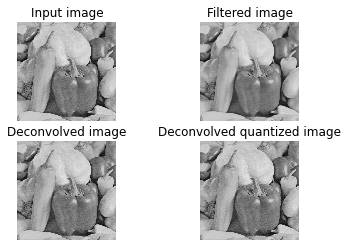

In [115]:
inputImage = imread('peppers.png', as_gray=True)
inputImage = img_as_float(inputImage)

# Filter radius and strength
a = 20
sigma = 1.5

# Create kernel, filter the image.
kernel = gaussian_filter(a, sigma)
filtered_image = cross_correlation(inputImage, kernel)
quantized_filtered_image = ((255*filtered_image).astype(np.uint8))/255

# Regularization parameter of the complex division
epsilon = 1e-4

deconvolved_image = Deconvolve(filtered_image, kernel, epsilon)
deconvolved_quantized_image = Deconvolve(quantized_filtered_image, kernel, epsilon)

# Plot the input image
plt.subplot(2, 2, 1)
plt.imshow(inputImage, interpolation='nearest', cmap=plt.cm.get_cmap('gray'), vmin=0, vmax=1)
plt.axis('off')
plt.title('Input image')

plt.subplot(2, 2, 2)
plt.imshow(filtered_image, interpolation='nearest', cmap=plt.cm.get_cmap('gray'), vmin=0, vmax=1)
plt.axis('off')
plt.title('Filtered image')

plt.subplot(2, 2, 3)
plt.imshow(deconvolved_image, interpolation='nearest', cmap=plt.cm.get_cmap('gray'), vmin=0, vmax=1)
plt.axis('off')
plt.title('Deconvolved image')

plt.subplot(2, 2, 4)
plt.imshow(deconvolved_quantized_image, interpolation='nearest', cmap=plt.cm.get_cmap('gray'), vmin=0, vmax=1)
plt.axis('off')
plt.title('Deconvolved quantized image')
plt.show()

# Exercise 10 Fast Fourier Transform(FFT)

In [129]:
def myfft(sig):
    
    n = len(sig)
    
    if n <= 1:
        
        return sig
    
    else :
    
        sig_2k = np.zeros(n//2)
        sig_2kt1 = np.zeros(n//2)
    
        for i in range(n//2):
        
            for j in range(n//2):
        
                sig_2k[i] += (sig[j] + sig[j + n//2])*np.exp(-2*np.pi*j*i*np.complex(0,1)*2/n)
            
                sig_2kt1[i] += (sig[j] - sig[j + n//2])*np.exp(-2*np.pi*np.complex(0,1)*i/n)*np.exp(-2*np.pi*np.complex(0,1)*j*i*2/n)
    
        return myfft(sig_2k[i]/n) + myfft(sig_2kt1[i]/n)

In [130]:
def SimpleFFT(input_signal):
    n = input_signal.shape[0]

    if n == 1:
        return input_signal
    else:
        first_half = input_signal[0:(n//2)]
        second_half = input_signal[(n//2):n]
        a = 0.5 * SimpleFFT(first_half + second_half)
        b = 0.5 * SimpleFFT(np.multiply(first_half - second_half, np.exp(- 2*np.pi*1j*(np.arange(n/2)) / n)))
        return np.vstack((a, b)).reshape((n,), order='F')


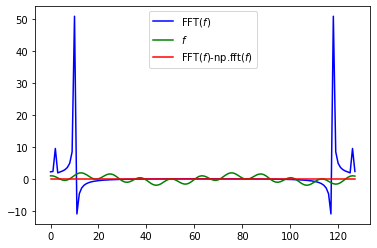

In [131]:
N = 128

# Create a signal
input_signal = np.sin(np.arange(N) / 10.) + np.cos(np.arange(N) / 2.)

python_FFT = np.real(np.fft.fft(input_signal))
# Our FFT definition differs from MATLAB's by a factor of N
own_FFT = N*np.real(SimpleFFT(input_signal))

# Plot input, our FFT and the difference between the two FFTs
plt.plot(own_FFT, 'b', label='FFT($f$)')
plt.plot(input_signal, 'g', label='$f$')
plt.plot(own_FFT-python_FFT, 'r', label='FFT($f$)-np.fft($f$)')
plt.legend()
plt.show()